In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

In [3]:
def genVecPlot(x_l,y_l,lattice):
    x, y = np.meshgrid(x_l, y_l)
    vx = np.cos(lattice)
    vy = np.sin(lattice)
    return x,y,vx,vy

def genAnime(fig,ax,t_l,x_l,y_l,latticeHist):
    ims = []
    for i in range(len(t_l)):
        x,y,vx,vy = genVecPlot(x_l,y_l,latticeHist[i,:,:])
        ims.append([ax.quiver(x,y,vx,vy,animated=True)])

    ani = animation.ArtistAnimation(
    fig, ims, interval=200,repeat_delay=1000
    )
    return ani

def genVorticeAnime(fig,ax,t_l,x_l,y_l,vorticeHist):
    ims = []
    for i in range(len(t_l)):
        # x, y = np.meshgrid(x_l, y_l)
        # x = x*vorticeHist[i,:,:]
        # y = y*vorticeHist[i,:,:]
        ims.append([ax.imshow(vorticeHist[i,:,:],animated=True)])

    ani = animation.ArtistAnimation(
    fig, ims, interval=200,repeat_delay=1000
    )
    return ani
    
    

In [28]:
file_name = "../data/230830/230830_d5_lattice_corr_"
corr_t_l = np.loadtxt(file_name+'scanx.csv',skiprows=1)
x_l = np.loadtxt(file_name+'scany.csv',skiprows=1)
y_l = np.loadtxt(file_name+'scany.csv',skiprows=1)
raw = np.loadtxt(file_name+'data.csv',skiprows=1,delimiter=',')
lattice_corr_real = raw[:,0].reshape((len(corr_t_l),len(x_l),len(y_l)),order='F')
lattice_corr_imag = raw[:,1].reshape((len(corr_t_l),len(x_l),len(y_l)),order='F')
lattice_corr = lattice_corr_real + 1j*lattice_corr_imag
lattice_corr_fft = np.fft.fftn(lattice_corr)
lattice_corr_fftr = np.roll(lattice_corr_fft,(int(len(x_l)/2),int(len(y_l)/2),),(1,2))

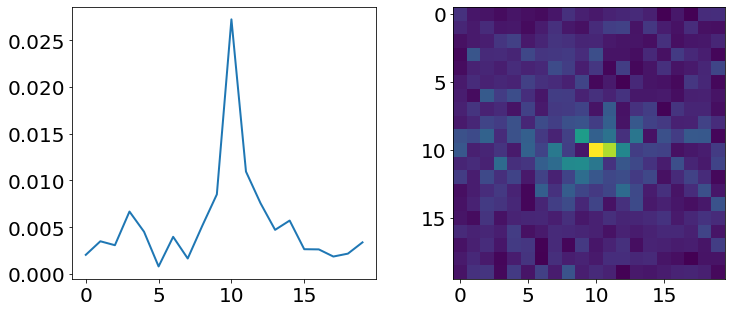

In [29]:
plt.figure(figsize=(12,5))
omega = 10
plt.subplot(1,2,1)
plt.plot(np.abs(lattice_corr_fftr[omega,:,int(len(y_l)/2)]))
plt.subplot(1,2,2)
plt.imshow(np.abs(lattice_corr_fftr[omega,:,:]))

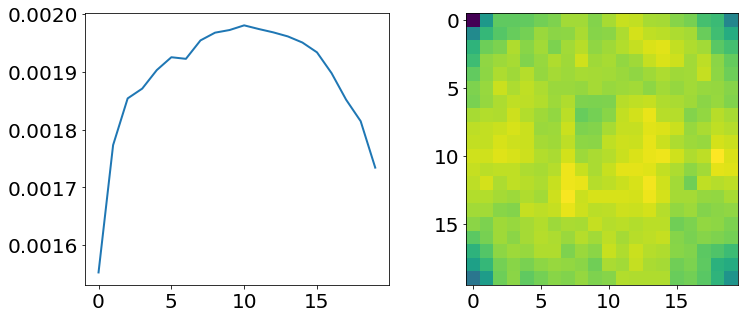

In [35]:
plt.figure(figsize=(12,5))
t = 0
plt.subplot(1,2,1)
plt.plot(np.abs(lattice_corr[t,:,0]))
plt.subplot(1,2,2)
plt.imshow(np.abs(lattice_corr[t,:,:]))

In [36]:
file_name = "../data/230830/230830_d10_vortice_corr_"
corr_t_l = np.loadtxt(file_name+'scanx.csv',skiprows=1)
x_l = np.loadtxt(file_name+'scany.csv',skiprows=1)
y_l = np.loadtxt(file_name+'scanz.csv',skiprows=1)
raw = np.loadtxt(file_name+'data.csv',skiprows=1,delimiter=',')
vortice_corr_real = raw[:,0].reshape((len(corr_t_l),len(x_l),len(y_l)),order='F')
vortice_corr_imag = raw[:,1].reshape((len(corr_t_l),len(x_l),len(y_l)),order='F')
vortice_corr = vortice_corr_real + 1j*vortice_corr_imag
vortice_corr_fft = np.fft.fftn(vortice_corr)
vortice_corr_fftr = np.roll(vortice_corr_fft,(int(len(x_l)/2),int(len(y_l)/2),),(1,2))

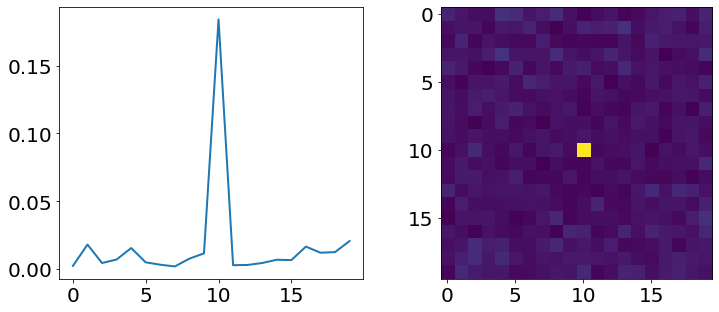

In [37]:
plt.figure(figsize=(12,5))
omega = 3
plt.subplot(1,2,1)
plt.plot(np.abs(vortice_corr_fftr[omega,:,int(len(y_l)/2)]))
plt.subplot(1,2,2)
plt.imshow(np.abs(vortice_corr_fftr[omega,:,:]))

In [ ]:
plt.figure(figsize=(12,5))
omega = 3
plt.subplot(1,2,1)
plt.plot(np.abs(vortice_corr_fftr[omega,:,int(len(y_l)/2)]))
plt.subplot(1,2,2)
plt.imshow(np.abs(vortice_corr_fftr[omega,:,:]))